<a href="https://colab.research.google.com/github/jaxayprajapati/tensorflow/blob/main/RegressionWithTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```
# Import required libraries
```



In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset

In [6]:
# Read insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [11]:
# Create Input and output
X = insurance_one_hot.drop("charges", axis=1)
y = insurance['charges']

In [12]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [13]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [16]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [23]:
# Build a neaural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model.compile(optimizer='sgd', loss=tf.keras.losses.MeanAbsoluteError(), metrics=["mae"])

#3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 8641.9395 - mae: 8641.9395
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.5347 - mae: 7886.5347
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7606.8184 - mae: 7606.8184
Epoch 4/100
34/34 [==============================] - 0s 990us/step - loss: 7543.2344 - mae: 7543.2344
Epoch 5/100
34/34 [==============================] - 0s 989us/step - loss: 7660.0640 - mae: 7660.0640
Epoch 6/100
34/34 [==============================] - 0s 968us/step - loss: 7560.1235 - mae: 7560.1235
Epoch 7/100
34/34 [==============================] - 0s 987us/step - loss: 7592.9263 - mae: 7592.9263
Epoch 8/100
34/34 [==============================] - 0s 955us/step - loss: 7692.6367 - mae: 7692.6367
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.5415 - mae: 7595.5415
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7704.4121 - mae:

In [24]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8747.9268 - mae: 8747.9268


[8747.9267578125, 8747.9267578125]

In [25]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now its looks like out model isn't performing well ...let's try and improve it!

To (try) improve our model, we'll run 2 experiments

1. Add extra layers
2. Train for longer



In [32]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# 2. Compile model
insurance_model_2.compile(
    optimizer='adam', loss=tf.keras.losses.MeanAbsoluteError(), metrics=["mae"]
)

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13108.2939 - mae: 13108.2939
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 10488.0713 - mae: 10488.0713
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7488.7959 - mae: 7488.7959
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7360.2207 - mae: 7360.2207
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7287.7485 - mae: 7287.7485
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7195.8872 - mae: 7195.8872
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7103.4126 - mae: 7103.4126
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 6989.4521 - mae: 6989.4521
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 6872.2051 - mae: 6872.2051
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 6743.3989 - mae: 6743.

In [33]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.4917 - mae: 3170.4917


[3170.49169921875, 3170.49169921875]

In [34]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [36]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(optimizer='adam', loss=tf.keras.losses.MeanAbsoluteError(), metrics=["mae"]
)

# 3. FIt the model
history = insurance_model_3.fit(X_train, y_train, epochs=300, verbose=1)

Epoch 1/300
34/34 [==============================] - 1s 1ms/step - loss: 12960.5918 - mae: 12960.5918
Epoch 2/300
34/34 [==============================] - 0s 1ms/step - loss: 9469.0322 - mae: 9469.0322
Epoch 3/300
34/34 [==============================] - 0s 1ms/step - loss: 7444.9951 - mae: 7444.9951
Epoch 4/300
34/34 [==============================] - 0s 1ms/step - loss: 7257.4644 - mae: 7257.4644
Epoch 5/300
34/34 [==============================] - 0s 1ms/step - loss: 7162.3999 - mae: 7162.3999
Epoch 6/300
34/34 [==============================] - 0s 1ms/step - loss: 7045.3096 - mae: 7045.3096
Epoch 7/300
34/34 [==============================] - 0s 1ms/step - loss: 6916.7148 - mae: 6916.7148
Epoch 8/300
34/34 [==============================] - 0s 1ms/step - loss: 6763.6514 - mae: 6763.6514
Epoch 9/300
34/34 [==============================] - 0s 1ms/step - loss: 6645.4717 - mae: 6645.4717
Epoch 10/300
34/34 [==============================] - 0s 1ms/step - loss: 6598.3857 - mae: 6598.38

In [37]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8747.9268 - mae: 8747.9268


[8747.9267578125, 8747.9267578125]

In [38]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.4917 - mae: 3170.4917


[3170.49169921875, 3170.49169921875]

In [39]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3226.4175 - mae: 3226.4175


[3226.41748046875, 3226.41748046875]

Text(0.5, 0, 'epochs')

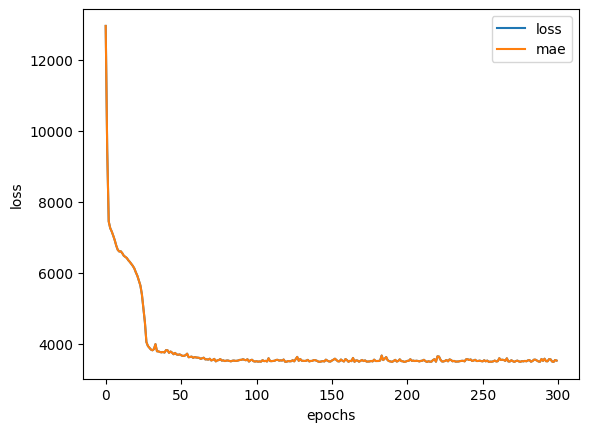

In [40]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing data (normalization and standardization)

I In terms of scaling the value , neaural networks tend to prefer normalization

If you're not sure which to use, you could try both and see which perform better

In [42]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [47]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

# Create X and Y values
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform train and test data with normalization and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [49]:
insurance.iloc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
charges     16884.924
Name: 0, dtype: object

In [51]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [54]:
# Set random seed
tf.random.set_seed(20)

#1. Create the model

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_4.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanAbsoluteError(),
    metrics=['mae']
)

#3. Fit the model
history_model_4 = insurance_model_4.fit(X_train_normal, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13335.1348 - mae: 13335.1348
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13172.4912 - mae: 13172.4912
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 11831.7871 - mae: 11831.7871
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 8593.8525 - mae: 8593.8525
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7837.8208 - mae: 7837.8208
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 7576.5444 - mae: 7576.5444
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7268.9150 - mae: 7268.9150
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 6915.8779 - mae: 6915.8779
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 6436.7773 - mae: 6436.7773
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 5752.9565 - mae: 575

In [55]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.0862 - mae: 3160.0862


[3160.086181640625, 3160.086181640625]